# Biomechanical features of orthopedic patients.
------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------

<img src="https://media.giphy.com/media/3orif4nSZh4HOoJuko/giphy.gif">

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

# Importing Dataset
**dataset link**: <a href ="https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients?select=column_2C_weka.csv" >Dataset link</a>

## Content
Field Descriptions:
--------------------------------------------------------------
- Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):
----------------------------------------------------------------
                                pelvic incidence.
                                pelvic tilt.
                                lumbar lordosis angle.
                                sacral slope.
                                pelvic radius.
                                grade of spondylolisthesis.

In [2]:
dataset=pd.read_csv('Dataset/orthopedic dataset.csv')
dataset.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [3]:
print("column Names:",dataset.columns.values)

column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [4]:
dataset.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          1180 non-null   float64
 1   pelvic_tilt numeric       1180 non-null   float64
 2   lumbar_lordosis_angle     1180 non-null   float64
 3   sacral_slope              1180 non-null   float64
 4   pelvic_radius             1180 non-null   float64
 5   degree_spondylolisthesis  1180 non-null   float64
 6   class                     1180 non-null   object 
dtypes: float64(6), object(1)
memory usage: 64.7+ KB


In [6]:
dataset.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,60.628995,19.534941,42.966891,34.621027,115.654789,39.428121
std,12.212527,10.779453,21.270700,12.197810,14.427055,40.814087
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,50.804924,12.537992,28.957819,25.065929,107.690466,11.400298
50%,61.542890,17.977784,38.926371,33.918037,116.250917,33.157646
75%,69.658921,24.822631,48.426306,43.163549,124.118877,55.995454
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [7]:
dataset['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

# Data Analysis

In [8]:
dataset_num=dataset.select_dtypes(include=['float64','int64'])
# print(dataset_num.head())

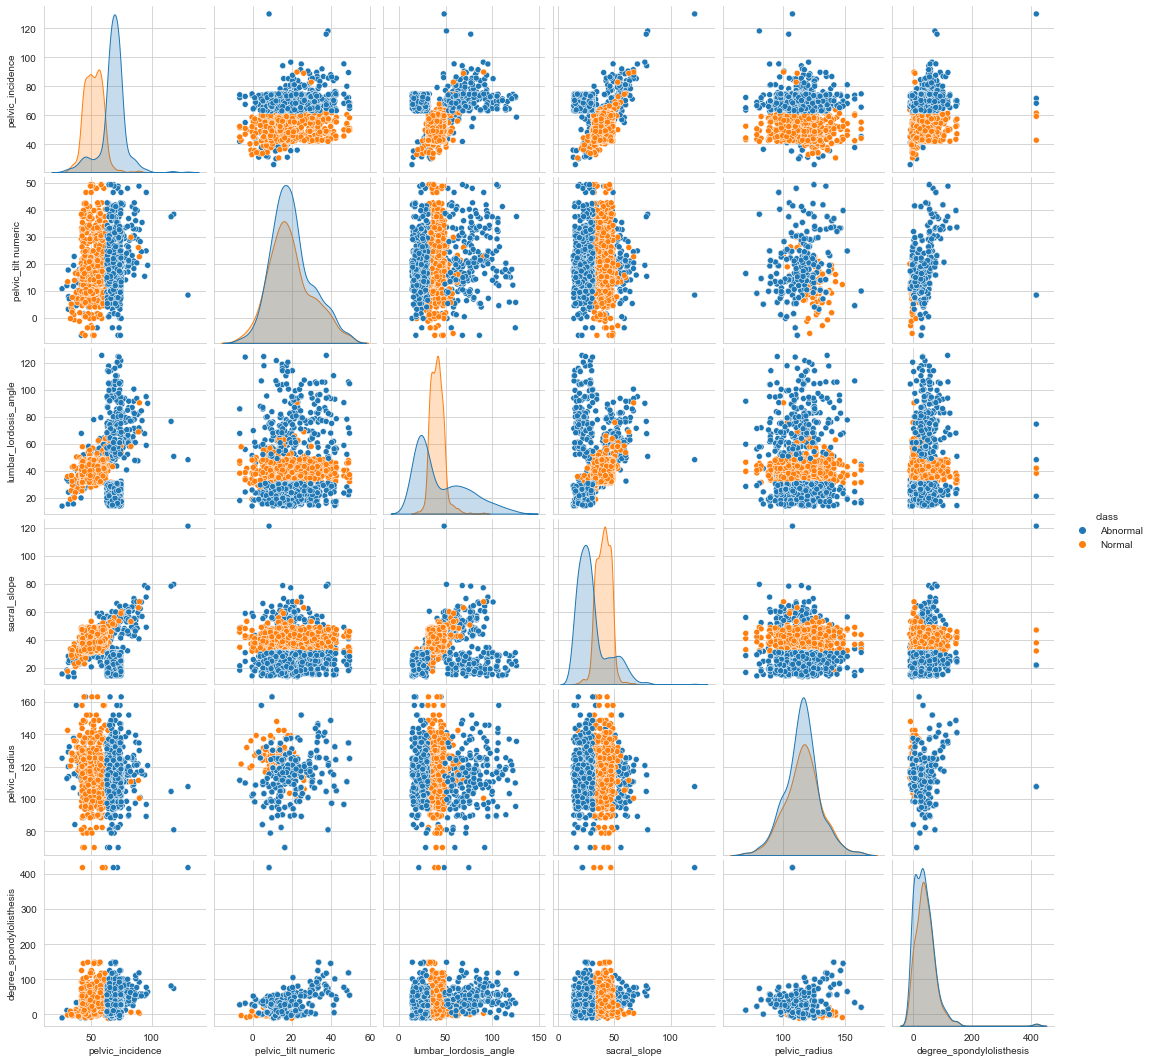

In [9]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="class",diag_kind = "kde",kind = "scatter")
plt.show()

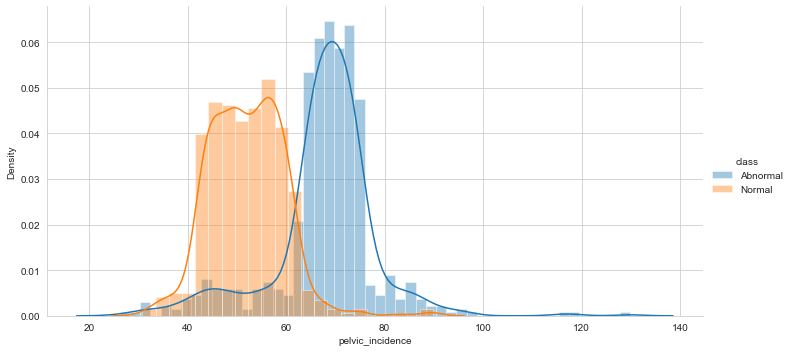

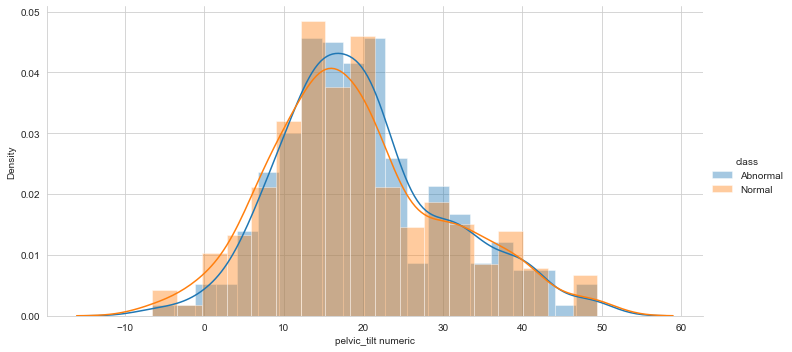

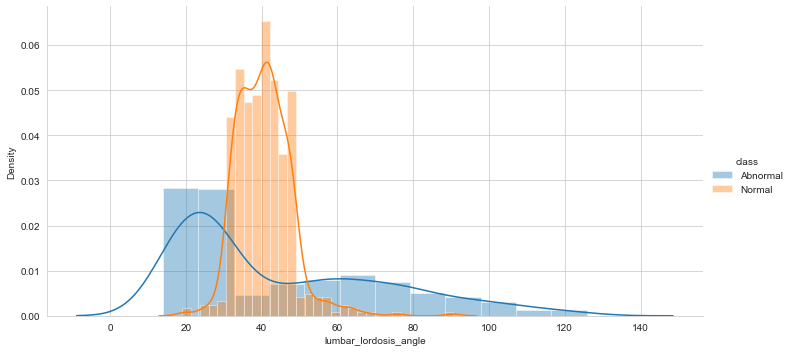

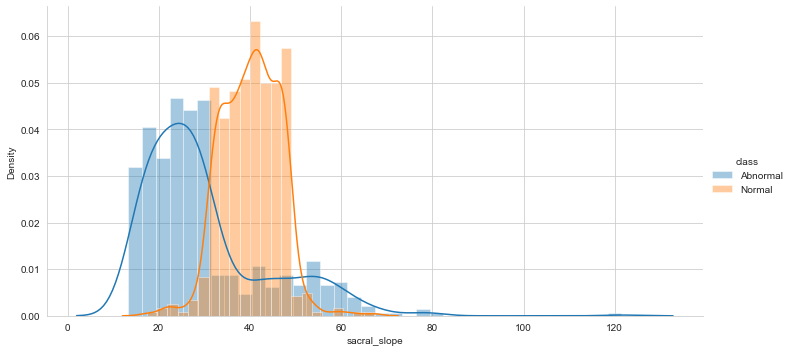

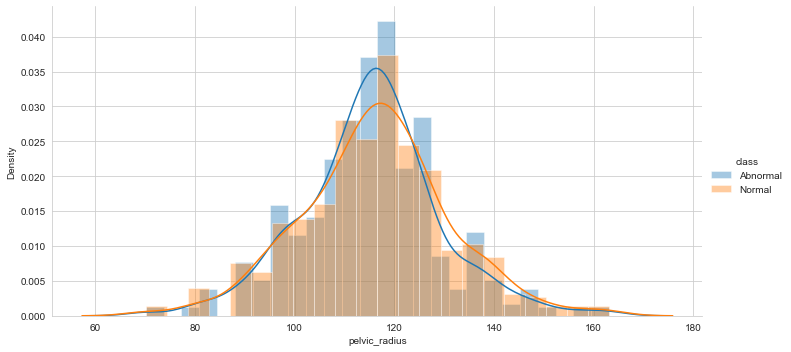

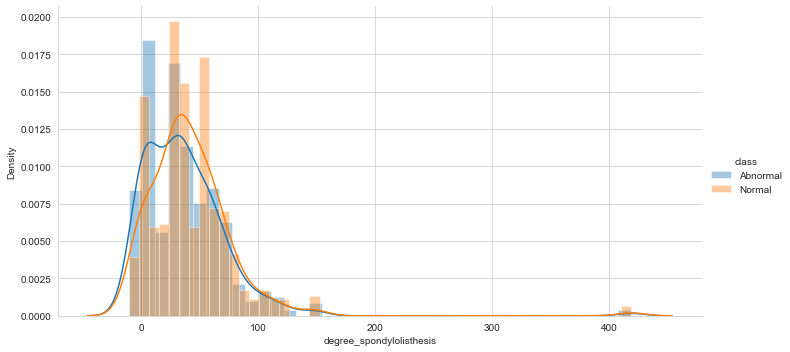

In [10]:
for name in dataset.columns.values[:-1]:
    sns.FacetGrid(dataset, hue="class",height=5,aspect=2).map(sns.distplot, name).add_legend()
plt.show()

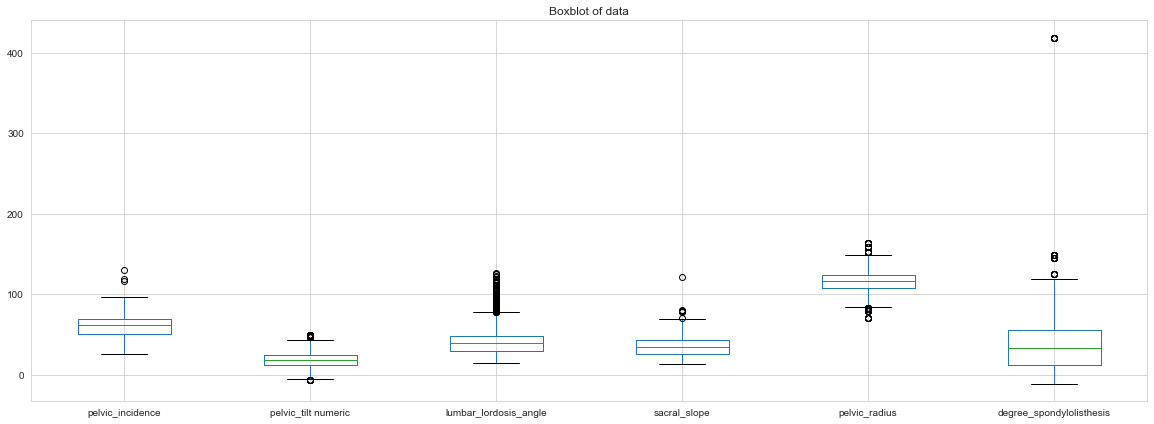

In [11]:
dataset.boxplot(column=['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
 'sacral_slope' ,'pelvic_radius', 'degree_spondylolisthesis' ],figsize=(20,7))
plt.title("Boxblot of data")
plt.show()

Abnormal    649
Normal      531
Name: class, dtype: int64


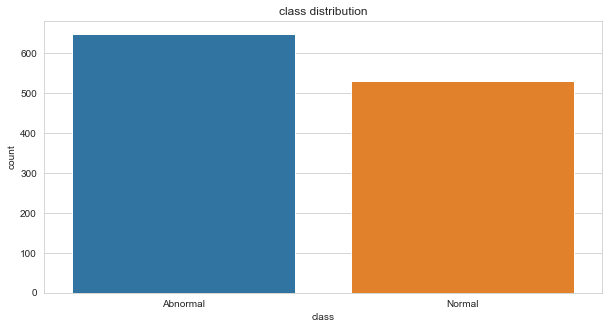

In [12]:
print(dataset['class'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot('class',data=dataset)
plt.title("class distribution")
plt.show()

In [3]:
dataset=dataset.replace({
    'class':{'Normal':1,'Abnormal':0}
})
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


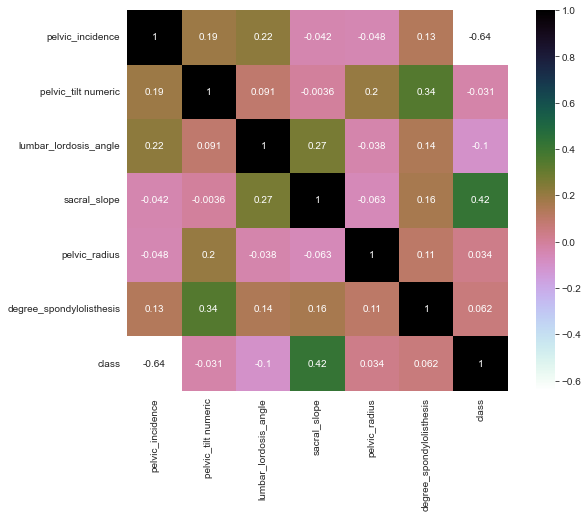

In [14]:
corr=dataset.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)
plt.show()

# Cheking: Missing values

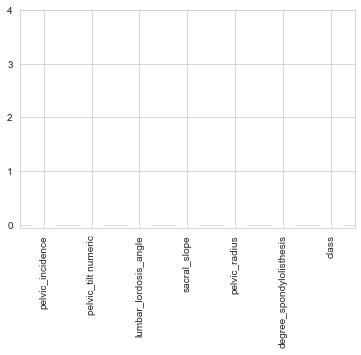

In [15]:
dataset.isnull().sum(axis=0).plot.bar()
plt.yticks(np.arange(0,5))
plt.show()

# Splitting dataset

In [3]:
data_input=dataset.drop(columns='class')
data_output=dataset['class']
data_input.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [4]:
data_output.head()

0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: class, dtype: object

In [5]:
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (578, 6)
y_train: (578,)
------------------------
X_val: (248, 6)
y_val: (248,)
------------------------
X_test: (354, 6)
y_test: (354,)


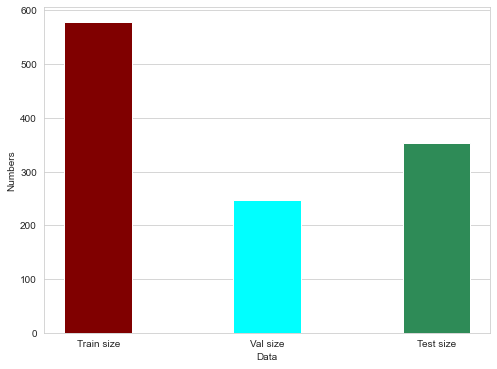

In [20]:
plt.figure(figsize=(8,6))
plt.bar(["Train size", "Val size", "Test size"], [X_train.shape[0], X_val.shape[0], X_test.shape[0]], color=["maroon", "cyan", "seagreen"], width=0.4)
plt.xlabel("Data")
plt.ylabel("Numbers")
plt.grid(axis='x')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [68]:
import pickle

with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

In [7]:
y_train.value_counts()

0    313
1    265
Name: class, dtype: int64

In [7]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)
X_train_balanced, y_train_balaned = ros.fit_resample(X_train_scaled, y_train)
y_train_balaned.value_counts()

Normal      313
Abnormal    313
Name: class, dtype: int64

# Helper function: Evaluate model

In [8]:
def eval_model(model,X_train,y_train,X_val,y_val):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    print(model.__class__.__name__)
    print('acc train:', acc_train)
    print('acc val:', acc_val)
    print('----------------------------')
    
    return(acc_train,acc_val)

# Applying KNN

# Hyperparameter tuning
### Tuning n_neighbors

In [31]:
n_nighbors_values=np.arange(1,31)
accuracy_train_values = []
accuracy_val_values = []

for n_nigh in n_nighbors_values:
    knn_model=KNeighborsClassifier(n_neighbors=n_nigh)
    acc_tarin,acc_val=eval_model(knn_model,X_train_balanced,y_train_balaned,X_val_scaled,y_val)
    accuracy_train_values.append(acc_tarin)
    accuracy_val_values.append(acc_val)
    
    
print("Best accuracy of validation is {} with K = {}".format(max(accuracy_val_values),1+accuracy_val_values.index(max(accuracy_val_values))))
print("Best accuracy is of train {} with K = {}".format(max(accuracy_train_values),1+accuracy_train_values.index(max(accuracy_train_values))))

KNeighborsClassifier
acc train: 1.0
acc val: 0.907258064516129
----------------------------
KNeighborsClassifier
acc train: 0.952076677316294
acc val: 0.8709677419354839
----------------------------
KNeighborsClassifier
acc train: 0.9408945686900958
acc val: 0.8870967741935484
----------------------------
KNeighborsClassifier
acc train: 0.9313099041533547
acc val: 0.9193548387096774
----------------------------
KNeighborsClassifier
acc train: 0.9233226837060703
acc val: 0.9274193548387096
----------------------------
KNeighborsClassifier
acc train: 0.9297124600638977
acc val: 0.9153225806451613
----------------------------
KNeighborsClassifier
acc train: 0.9265175718849841
acc val: 0.9112903225806451
----------------------------
KNeighborsClassifier
acc train: 0.9265175718849841
acc val: 0.9112903225806451
----------------------------
KNeighborsClassifier
acc train: 0.9153354632587859
acc val: 0.9032258064516129
----------------------------
KNeighborsClassifier
acc train: 0.92012779552

In [32]:
results_knn=pd.DataFrame({
    'n_neighbours': n_nighbors_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})
results_knn

,n_neighbours,accuracy_train,accuracy_val
0,1,1.000000,0.907258
1,2,0.952077,0.870968
2,3,0.940895,0.887097
3,4,0.931310,0.919355
4,5,0.923323,0.927419
5,6,0.929712,0.915323
6,7,0.926518,0.911290
7,8,0.926518,0.911290
8,9,0.915335,0.903226
9,10,0.920128,0.907258


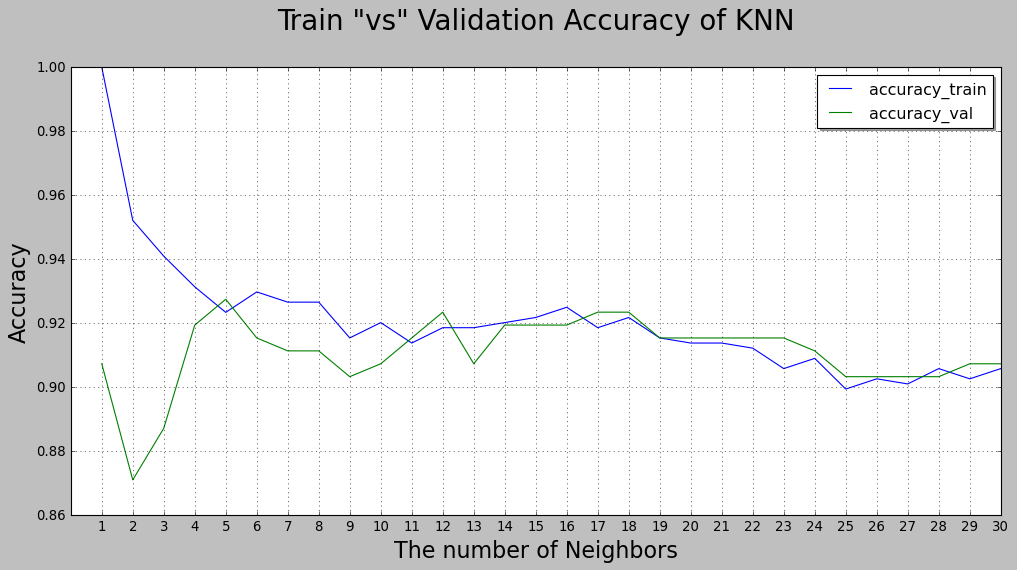

In [67]:
results_knn.plot(x='n_neighbours', y=['accuracy_train', 'accuracy_val'], figsize=(15, 7))
plt.style.use('classic')
plt.title('Train "vs" Validation Accuracy of KNN\n',fontsize=25)
plt.xlabel('The number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(np.arange(1,31))
plt.grid(axis='both')
legend = plt.legend(loc='best', shadow=True)
plt.show()

According to the previous plot, we select n_neighbours = `5` as the best value for n_neighbours

In [69]:
weights_values = ['uniform', 'distance']
accuracy_train_values = []
accuracy_val_values = []

for w in weights_values:
    knn_model=KNeighborsClassifier(n_neighbors=5,weights=w)
    acc_tarin,acc_val=eval_model(knn_model,X_train_balanced,y_train_balaned,X_val_scaled,y_val)
    accuracy_train_values.append(acc_tarin)
    accuracy_val_values.append(acc_val)
    
    
    
results_knn_weight=pd.DataFrame({
    'weights': weights_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})
results_knn_weight

KNeighborsClassifier
acc train: 0.9233226837060703
acc val: 0.9274193548387096
----------------------------
KNeighborsClassifier
acc train: 1.0
acc val: 0.9153225806451613
----------------------------


,weights,accuracy_train,accuracy_val
0,uniform,0.923323,0.927419
1,distance,1.000000,0.915323


<Figure size 800x400 with 0 Axes>

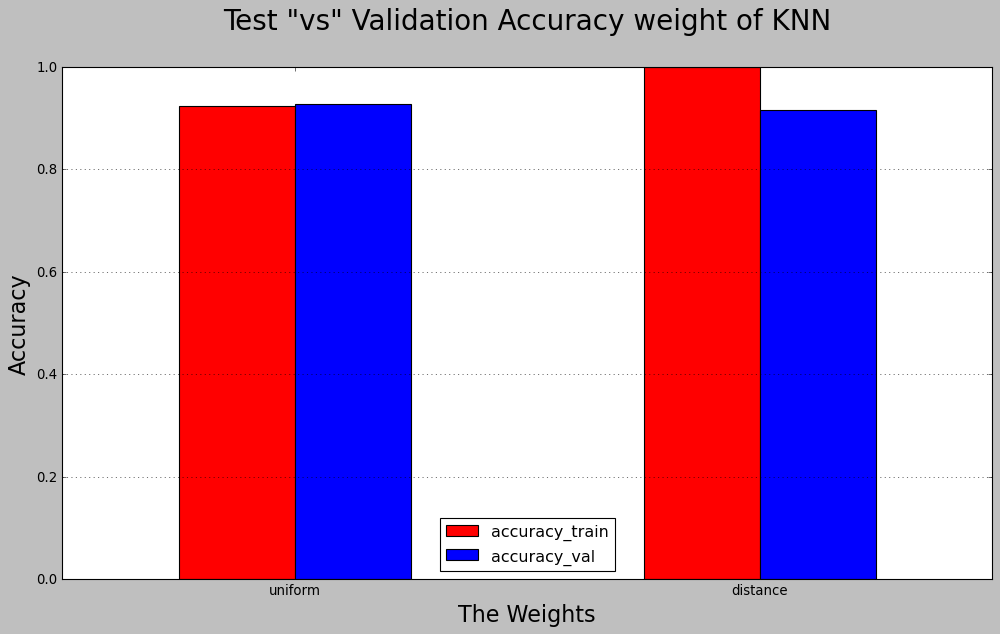

In [75]:
plt.figure(figsize=(10,5))
results_knn_weight.plot.bar(x='weights', y=['accuracy_train', 'accuracy_val'],color=['red','blue'],figsize=(15,8))
plt.title('Test "vs" Validation Accuracy weight of KNN\n',fontsize=25)
plt.xlabel('The Weights',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(rotation=360)
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()

According to the previous plot we will select the weight = `uniform`

# Final Knn Test

In [13]:
best_knn_model=KNeighborsClassifier(n_neighbors=5,weights='uniform')
acc_tarin_knn,acc_val_knn=eval_model(best_knn_model,X_train_balanced,y_train_balaned,X_val_scaled,y_val)

KNeighborsClassifier
acc train: 0.9233226837060703
acc val: 0.9274193548387096
----------------------------


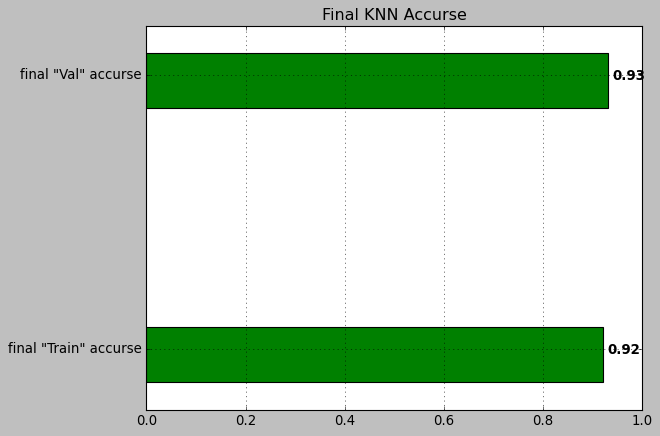

In [15]:
plt.style.use('classic')
x = [u'final "Train" accurse', u'final "Val" accurse']
y = [round(acc_tarin_knn,2), round(acc_val_knn,2)]

fig, ax = plt.subplots()
width = 0.2
ind = np.arange(len(y))
ax.barh(ind, y, width, color='g')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x, minor=False)
plt.title('Final KNN Accurse')
plt.grid()
for i, v in enumerate(y):
    ax.text(v + 0.01, i + 0.001, str(v), color='black', fontweight='bold')
plt.show()

# Applying naive bayes NB

## Model 1: Gaussian Naive Bayes

In [82]:
nb_model1 = GaussianNB() 
acc_tarin1,acc_val2=eval_model(nb_model1,X_train_balanced,y_train_balaned,X_val_scaled,y_val)

GaussianNB
acc train: 0.9057507987220448
acc val: 0.9314516129032258
----------------------------


## Model 2:  Bernoulli Naive Bayes

In [83]:
nb_model2 = BernoulliNB()
acc_train2, acc_val2 = eval_model(nb_model2, X_train_balanced, y_train_balaned, X_val_scaled, y_val)

BernoulliNB
acc train: 0.865814696485623
acc val: 0.8709677419354839
----------------------------


In [84]:
results_nb = pd.DataFrame({
    'model': ['GaussianNB',  'BernoulliNB'],
    'acc_train': [acc_train1, acc_train2],
    'acc_val': [acc_val1, acc_val2],
})

results_nb

,model,acc_train,acc_val
0,GaussianNB,0.901384,0.935484
1,BernoulliNB,0.865815,0.870968


<Figure size 800x400 with 0 Axes>

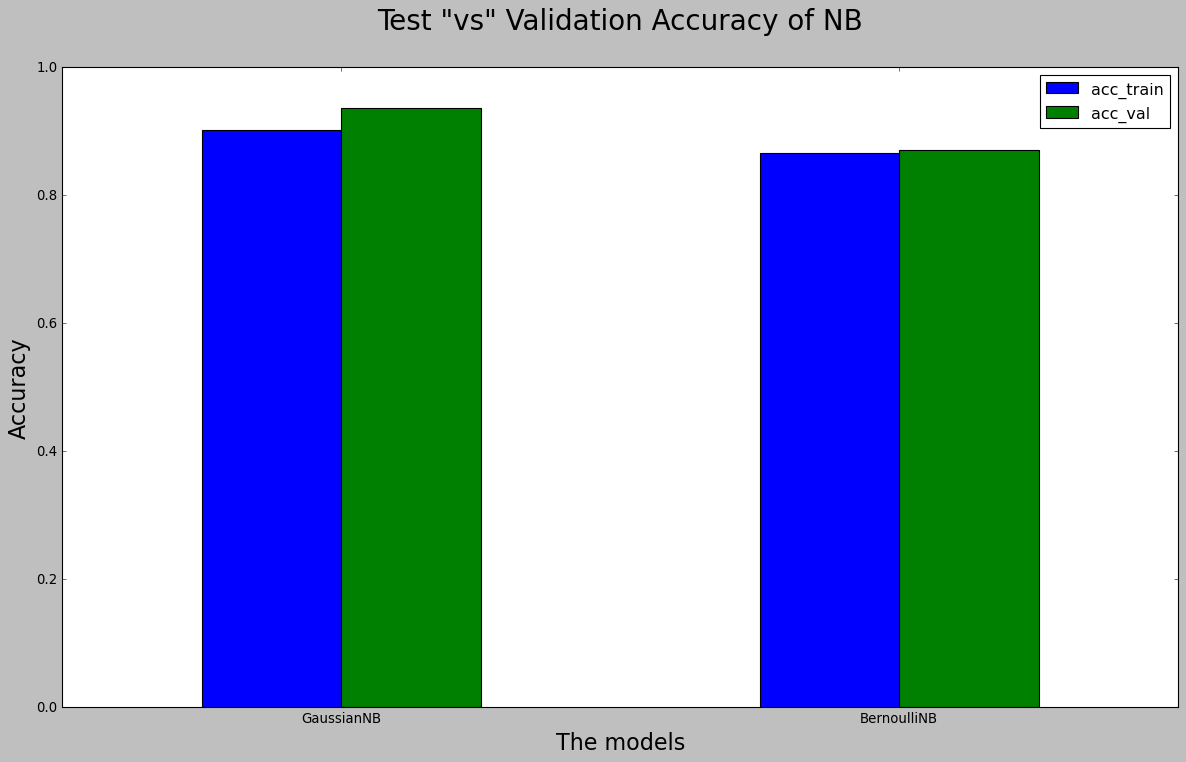

In [87]:
plt.figure(figsize=(10,5))
results_nb.plot.bar(x='model',y=['acc_train','acc_val'],figsize=(18,10))
plt.title('Test "vs" Validation Accuracy of NB\n',fontsize=25)
plt.xlabel('The models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(rotation=360)
plt.legend(loc='best')
plt.show()

# final NB test

In [89]:
best_nb_model=GaussianNB()
acc_train_nb, acc_val_nb = eval_model(best_nb_model, X_train_balanced, y_train_balaned, X_val_scaled, y_val)

GaussianNB
acc train: 0.9057507987220448
acc val: 0.9314516129032258
----------------------------


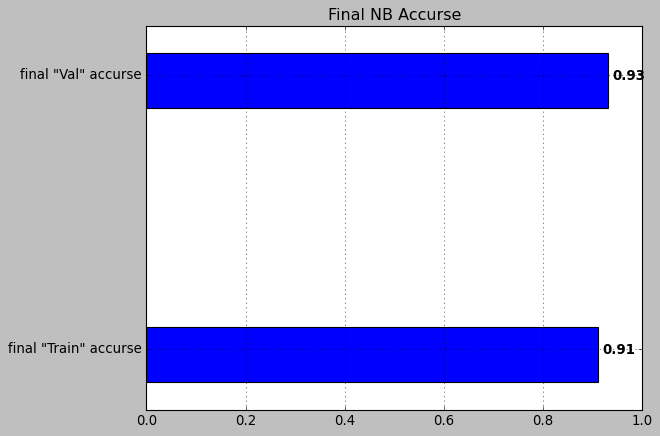

In [187]:
x = [u'final "Train" accurse', u'final "Val" accurse']
y = [round(acc_train_nb,2), round(acc_val_nb,2)]

fig, ax = plt.subplots()
width = 0.2
ind = np.arange(len(y))
ax.barh(ind, y, width, color='b')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x, minor=False)
plt.title('Final NB Accurse')
plt.grid()
for i, v in enumerate(y):
    ax.text(v + 0.01, i + 0.001, str(v), color='black', fontweight='bold')
plt.show()

# Decision tree classifier

In [97]:
max_depth_values = list(range(1, 21))
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    acc_train, acc_val = eval_model(dt_model, X_train_balanced, y_train_balaned, X_val_scaled, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
    
    
print("Best accuracy of validation is {} with Mac Depth = {}".format(max(acc_val_values),1+acc_val_values.index(max(acc_val_values))))
print("Best accuracy is of train {} with Max Depth = {}".format(max(acc_train_values),1+acc_train_values.index(max(acc_train_values))))

DecisionTreeClassifier
acc train: 0.8993610223642172
acc val: 0.9032258064516129
----------------------------
DecisionTreeClassifier
acc train: 0.9073482428115016
acc val: 0.907258064516129
----------------------------
DecisionTreeClassifier
acc train: 0.9297124600638977
acc val: 0.9354838709677419
----------------------------
DecisionTreeClassifier
acc train: 0.9488817891373802
acc val: 0.9475806451612904
----------------------------
DecisionTreeClassifier
acc train: 0.9648562300319489
acc val: 0.9153225806451613
----------------------------
DecisionTreeClassifier
acc train: 0.9792332268370607
acc val: 0.9354838709677419
----------------------------
DecisionTreeClassifier
acc train: 0.9824281150159745
acc val: 0.9193548387096774
----------------------------
DecisionTreeClassifier
acc train: 0.9888178913738019
acc val: 0.9274193548387096
----------------------------
DecisionTreeClassifier
acc train: 0.9936102236421726
acc val: 0.9354838709677419
----------------------------
DecisionTre

In [98]:
results_dt = pd.DataFrame({
    'max_depth': max_depth_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_dt

,max_depth,acc_train,acc_val
0,1,0.899361,0.903226
1,2,0.907348,0.907258
2,3,0.929712,0.935484
3,4,0.948882,0.947581
4,5,0.964856,0.915323
5,6,0.979233,0.935484
6,7,0.982428,0.919355
7,8,0.988818,0.927419
8,9,0.993610,0.935484
9,10,0.995208,0.931452


<Figure size 800x400 with 0 Axes>

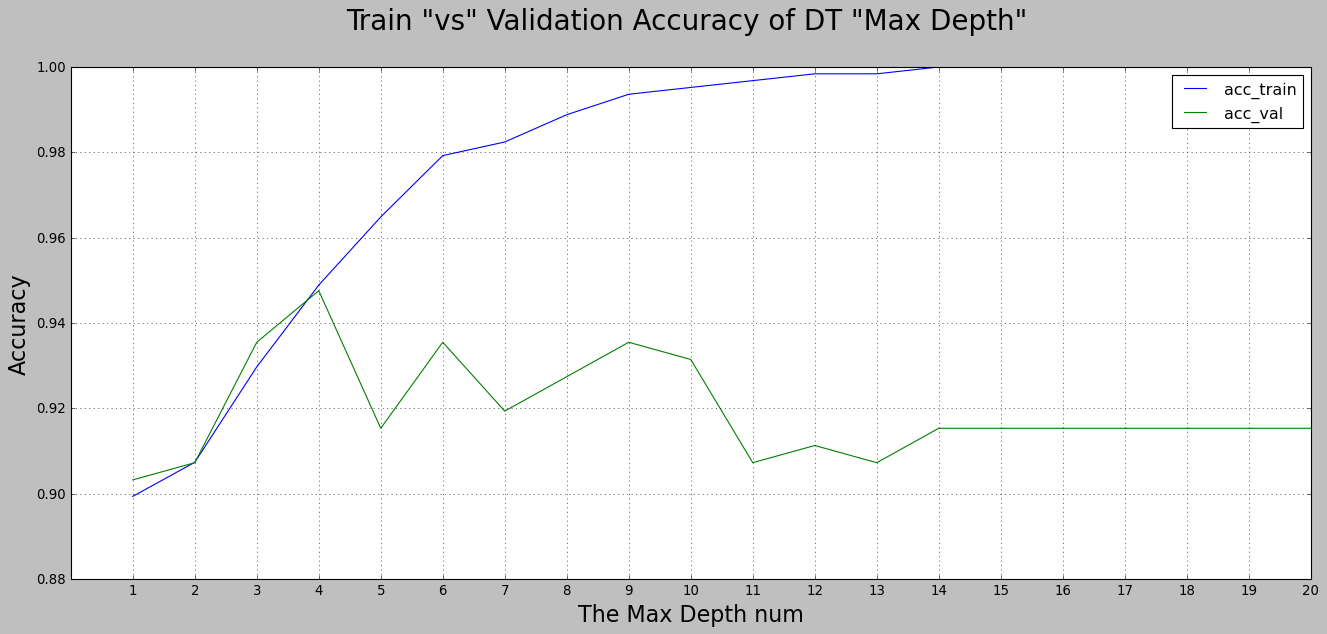

In [99]:
plt.figure(figsize=(10,5))
results_dt.plot(x='max_depth', y=['acc_train', 'acc_val'], figsize=(20, 8))
plt.xticks(np.arange(1, 21))
plt.title('Train "vs" Validation Accuracy of DT "Max Depth" \n',fontsize=25)
plt.xlabel('The Max Depth num',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid(axis='both')
plt.show()

We select max_depth = `4`

In [100]:
criterion_values = ['gini', 'entropy']
acc_train_values = []
acc_val_values = []

for criterion in criterion_values:
    dt_model = DecisionTreeClassifier(max_depth=4, criterion=criterion, random_state=0)
    acc_train, acc_val = eval_model(dt_model, X_train_balanced, y_train_balaned, X_val_scaled, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_dt2 = pd.DataFrame({
    'criterion': criterion_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_dt2

DecisionTreeClassifier
acc train: 0.9488817891373802
acc val: 0.9475806451612904
----------------------------
DecisionTreeClassifier
acc train: 0.9440894568690096
acc val: 0.9556451612903226
----------------------------


,criterion,acc_train,acc_val
0,gini,0.948882,0.947581
1,entropy,0.944089,0.955645


<Figure size 800x400 with 0 Axes>

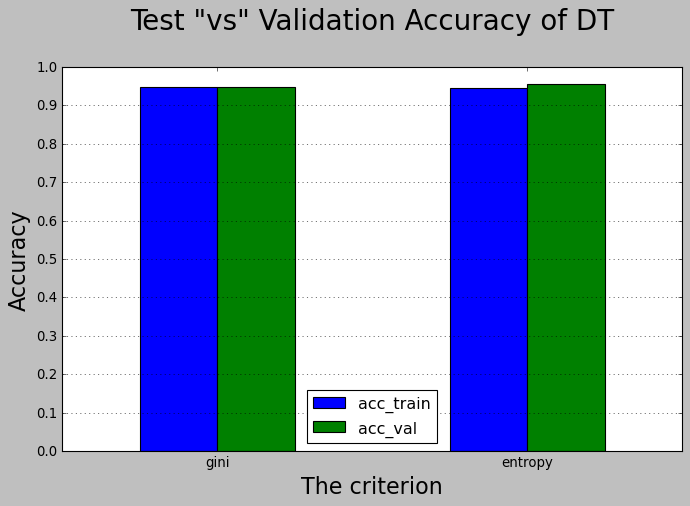

In [102]:
plt.figure(figsize=(10,5))
results_dt2.plot.bar(x='criterion', y=['acc_train', 'acc_val'], figsize=(10, 6))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('Test "vs" Validation Accuracy of DT\n',fontsize=25)
plt.xlabel('The criterion',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(rotation=360)
plt.legend(loc='lower center')
plt.grid(axis='y')
plt.show()

We select criterion = `entropy`

# Final Test of Dt 

In [104]:
best_dt_model=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
acc_train_dt, acc_val_dt = eval_model(best_dt_model, X_train_balanced, y_train_balaned, X_val_scaled, y_val)

DecisionTreeClassifier
acc train: 0.9440894568690096
acc val: 0.9556451612903226
----------------------------


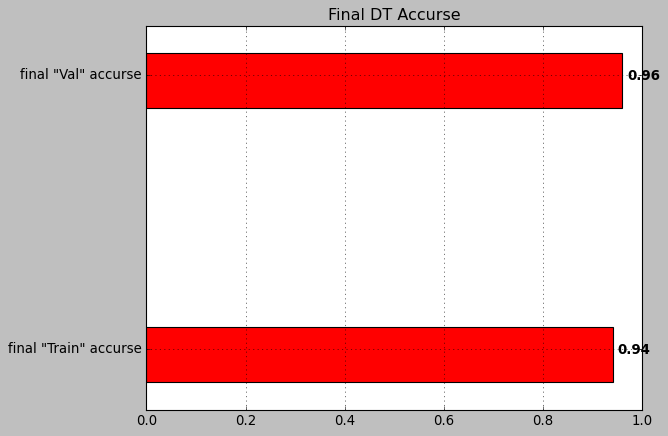

In [188]:
x = [u'final "Train" accurse', u'final "Val" accurse']
y = [round(acc_train_dt,2), round(acc_val_dt,2)]

fig, ax = plt.subplots()
width = 0.2
ind = np.arange(len(y))
ax.barh(ind, y, width, color='r')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x, minor=False)
plt.title('Final DT Accurse')
plt.grid()
for i, v in enumerate(y):
    ax.text(v + 0.01, i + 0.001, str(v), color='black', fontweight='bold')
plt.show()

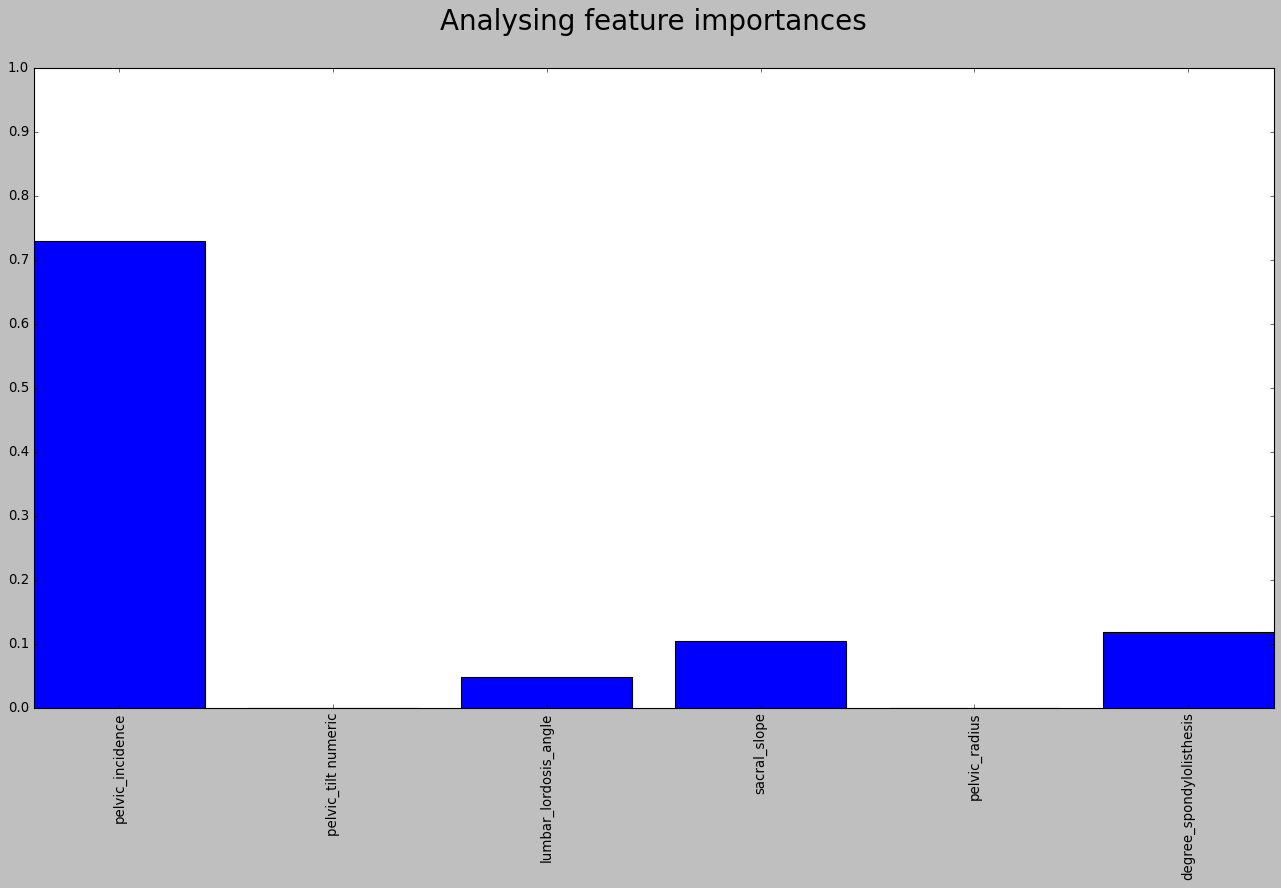

In [105]:
plt.figure(figsize=(20, 10))
plt.bar(X_train.columns, best_dt_model.feature_importances_)
plt.title("Analysing feature importances\n",fontsize=25)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

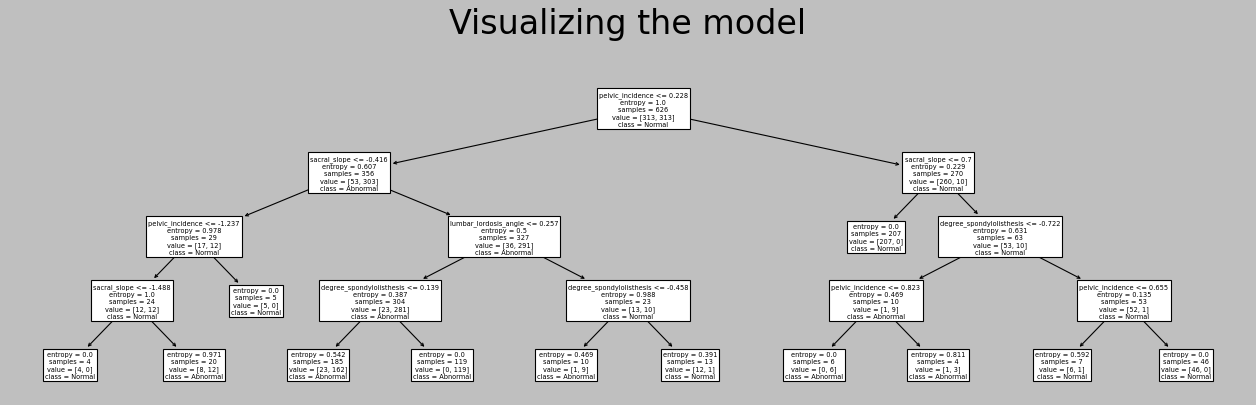

In [106]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 5))
plot_tree(best_dt_model, feature_names=X_train.columns, class_names=['Normal', 'Abnormal'])
plt.title('Visualizing the model\n',fontsize=30)
plt.show()

# Voting to make decision 

In [16]:
from sklearn.ensemble import VotingClassifier

In [112]:
estimators = [
    ('KNN', best_knn_model),
    ('Naive Bayes', best_nb_model),
    ('Decision Tree', best_dt_model),
]

voting_clf = VotingClassifier(estimators)

In [113]:
all_estimators = estimators + [('voting', voting_clf)]

final_results = {
    'model': [],
    'acc train': [],
    'acc val': []
}

for (name, clf) in all_estimators:
    acc_train, acc_val = eval_model(
        clf, X_train_balanced, y_train_balaned, X_val_scaled, y_val
    )
    final_results['model'].append(name)
    final_results['acc train'].append(acc_train)
    final_results['acc val'].append(acc_val)

KNeighborsClassifier
acc train: 0.9137380191693291
acc val: 0.9153225806451613
----------------------------
GaussianNB
acc train: 0.9057507987220448
acc val: 0.9314516129032258
----------------------------
DecisionTreeClassifier
acc train: 0.9440894568690096
acc val: 0.9556451612903226
----------------------------
VotingClassifier
acc train: 0.9217252396166135
acc val: 0.9435483870967742
----------------------------


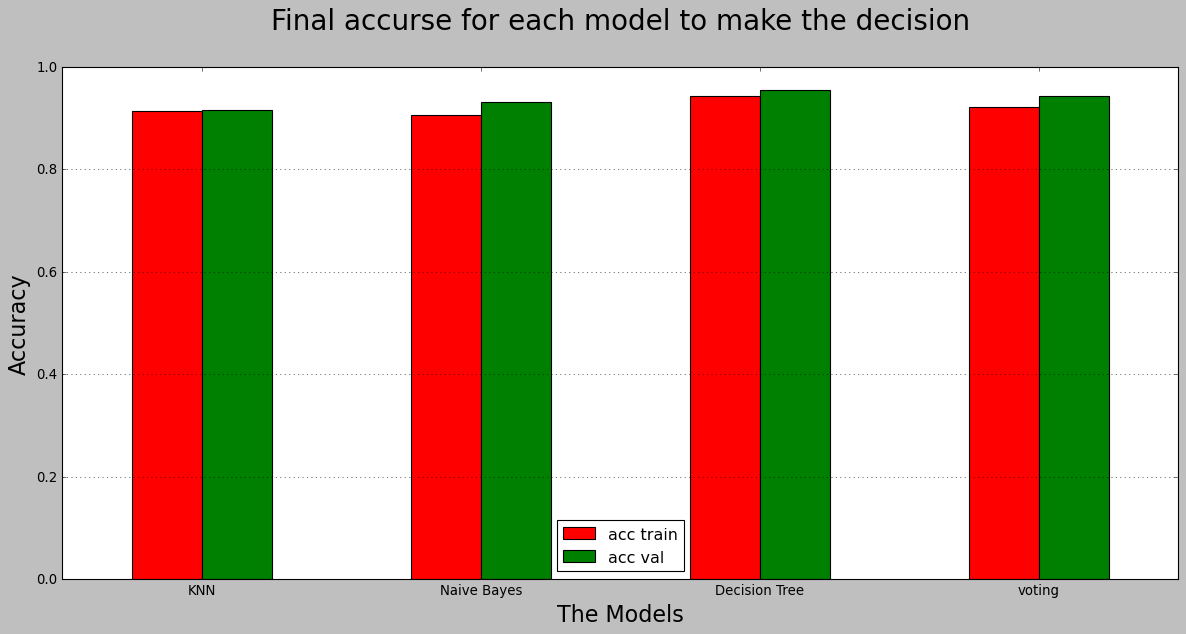

In [121]:
final_results=pd.DataFrame(final_results)
final_results.plot.bar(x='model',y=['acc train','acc val'],color=['red','green'],
                       figsize=(18,8),width=0.5)
plt.xticks(rotation=360)
plt.title('Final accurse for each model to make the decision\n',fontsize=25)
plt.xlabel('The Models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()

In [123]:
final_results.sort_values(by='acc val', ascending=False, ignore_index=True, inplace=True)
final_results

,model,acc train,acc val
0,Decision Tree,0.944089,0.955645
1,voting,0.921725,0.943548
2,Naive Bayes,0.905751,0.931452
3,KNN,0.913738,0.915323


In [124]:
final_results.to_csv('results.csv')

# Final Test

In [191]:
final_model=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
final_model.fit(X_train_balanced,y_train_balaned)
y_pred_test = final_model.predict(X_test_scaled)
final_acc=accuracy_score(y_test, y_pred_test)
print("the final acc = ",round(final_acc,2)*100,"%")

the final acc =  94.0 %


confusion matrix is 
 [[179  19]
 [  1 155]]


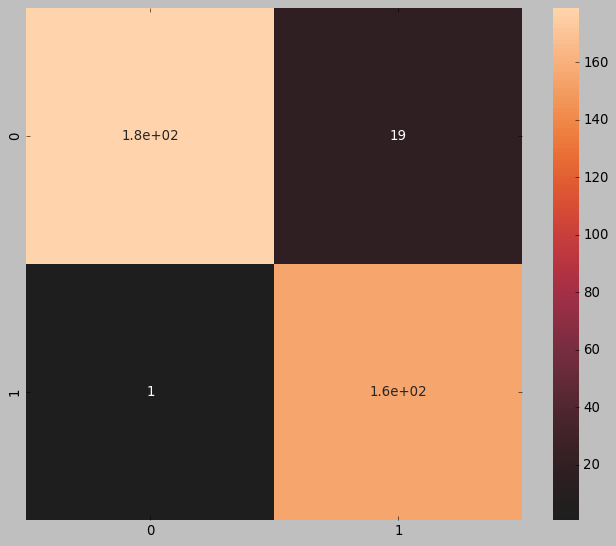

In [130]:
#calculate confusion matrix
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test, y_pred_test)
print('confusion matrix is \n',cm)
sns.heatmap(cm,annot=True,center=True)
plt.show()

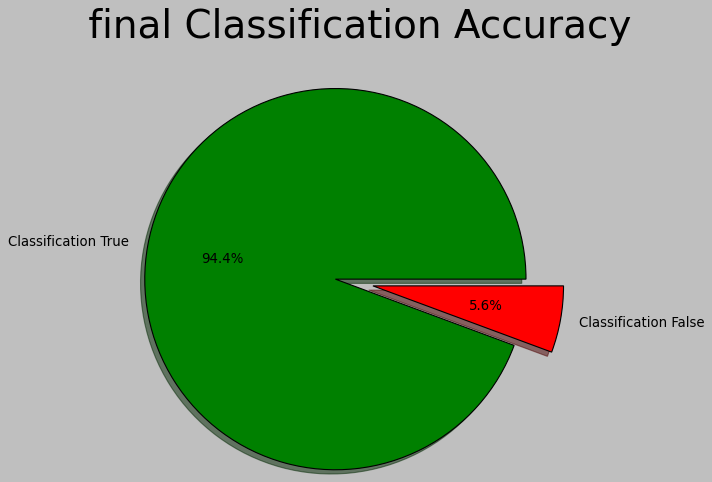

In [131]:
plt.style.use('classic')
plt.pie([final_acc,1-final_acc],labels=('Classification True','Classification False')
        ,explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,colors=['green','red'])
plt.axis('equal')
plt.title(' final Classification Accuracy\n',fontsize=35)
plt.show()

# save model

In [192]:
import pickle

with open('saved-model.pickle', 'wb') as f:
    pickle.dump(final_model, f)

# Test the model after load

In [193]:
import pickle

with open('saved-model.pickle', 'rb') as f:
    my_model = pickle.load(f)

with open('scaler.pickle', 'rb') as f:
    my_scaler = pickle.load(f)

In [208]:
# example input
list_test=[67.2,10.6,66,30.1,109.3,55]
x = np.array(list_test)

In [209]:
x_scaled = my_scaler.transform([x])

In [210]:
y = my_model.predict(x_scaled)
if y[0]=='1':
    print('Normal Case')
else:
    print("Abnormal Case")

Abnormal Case


# ♥♥ Thank you ♥♥